In [10]:
import json
import numpy as np
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

In [2]:
with open("../../data/out/prompts_speaker_exp_Llama-3.2-1B.json", encoding="utf-8") as f:
    res_llama = json.load(f)

rres_llama = res_llama["real"]  # reproduction from real speakers
rres_llama_plain = rres_llama["plain"]  # focus on plain, compare to heart later

In [3]:
# first, inspect overall distribution of predictions
rlp_golds = np.array(
    [item["metadata"]["response"] for trial in rres_llama_plain for item in trial["trial_items"]]
)
rlp_preds = np.array(
    [item["pred"] for trial in rres_llama_plain for item in trial["trial_items"]]
)

In [4]:
# overall accuracy
(rlp_golds == rlp_preds).mean()

np.float64(0.2857142857142857)

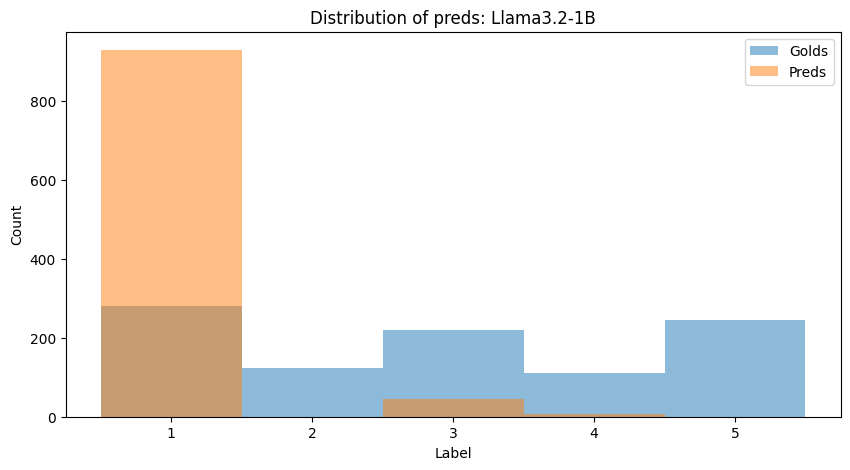

In [9]:
plt.figure(figsize=(10, 5))
plt.hist(rlp_golds, bins=np.arange(1, 7)-0.5, alpha=0.5, label="Golds")
plt.hist(rlp_preds, bins=np.arange(1, 7)-0.5, alpha=0.5, label="Preds")
plt.xticks(range(1, 6))
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of preds: Llama3.2-1B")
plt.legend()
plt.savefig("out/llama3.2-1B_distribution.png")
plt.show()

In [11]:
kappa_llama = cohen_kappa_score(rlp_golds, rlp_preds)
kappa_llama

0.005605428292699943